# **Project Name**    - FBI Time Series Forecasting




# **Project Summary -**
The FBI Crime Investigation Project is a strategic initiative that leverages the power of machine learning and time series forecasting to predict crime trends and enhance public safety across urban centers in the United States. In recent years, the rise in crime rates and the increasingly complex nature of criminal activities have presented major challenges for law enforcement agencies. These agencies are under constant pressure to anticipate criminal incidents, allocate limited resources wisely, and implement effective strategies for crime prevention. This project addresses those challenges by applying advanced data analytics to predict the frequency and distribution of crime incidents, thereby supporting informed decision-making and proactive policing.

At the core of the project is the development of a predictive model that forecasts the number of crime incidents on a monthly basis. The model is built using granular historical data that includes day-level and hour-level details of crime occurrences. Key features of the dataset include crime types, geographical coordinates (latitude and longitude), timestamps, neighborhood identifiers, and other contextual attributes. This allows for a comprehensive analysis of both spatial and temporal dimensions of crime data. The use of time series forecasting techniques enables the model to detect seasonality, trends, and patterns in the data, allowing law enforcement agencies to anticipate when and where crimes are most likely to happen.

By understanding these patterns, police departments can optimize patrol schedules, allocate personnel more efficiently, and deploy resources where they are needed most. For example, if the model predicts a spike in burglaries in a particular area during certain hours or months, law enforcement can increase surveillance and patrolling during those times. This approach not only enhances operational efficiency but also helps in reducing crime rates by enabling timely interventions.

Importantly, the benefits of this predictive system extend beyond traditional law enforcement. Urban planners, policymakers, and community organizations can also leverage the insights generated from the model. By identifying high-risk zones and times for specific types of crimes, urban safety initiatives can be designed more effectively. For instance, knowing that certain crimes peak in poorly lit areas during late hours can inform decisions about improving street lighting, installing surveillance cameras, or launching community policing initiatives. These targeted measures can significantly contribute to building safer and more resilient communities.

Additionally, this model can support public awareness campaigns, emergency response planning, and collaborative efforts with non-profit organizations to address the root causes of crime, such as poverty, lack of education, and social inequality. The insights derived from the model can guide preventive strategies and inform long-term policies aimed at crime reduction.

From a technical perspective, the project involves data cleaning, feature engineering, exploratory data analysis (EDA), and the application of time series models such as ARIMA, SARIMA, and Prophet. Performance metrics such as R-squared, RMSE, and Mean Absolute Error are used to evaluate and fine-tune the model. Visualization tools like Matplotlib, Seaborn, and Plotly are employed to communicate the results and highlight crime trends effectively.

In summary, the FBI Crime Investigation Project is a robust example of how data science and machine learning can be applied to address real-world problems. By forecasting crime patterns with high accuracy, the project helps multiple stakeholders—from police departments to city administrators—make strategic, data-driven decisions that improve public safety and enhance the quality of life for citizens.









# **GitHub Link -**

# **Problem Statement**


Rising crime rates and limited law enforcement resources present a major challenge for public safety. Traditional reactive policing is no longer sufficient to prevent crime effectively. There is a critical need for predictive tools that can forecast crime trends based on historical data. This project aims to develop a time series forecasting model using FBI crime data, incorporating factors such as time, location, and crime type. By identifying future crime patterns, the model enables smarter resource allocation, targeted patrolling, and data-driven policymaking—ultimately helping build safer and more resilient communities.

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/MyDrive/fbi_crime/Train.xlsx"
test_path = "/content/drive/MyDrive/fbi_crime/Test.csv"

In [5]:
df = pd.read_excel(file_path)
test_df = pd.read_csv(test_path)

### Dataset First View

In [6]:
df.head(10)

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12
5,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,20.0,45.0,1999,3,26,1999-03-26
6,Break and Enter Residential/Other,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610,12.0,0.0,1999,3,10,1999-03-10
7,Mischief,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725,4.0,13.0,1999,6,28,1999-06-28
8,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,9.0,2.0,1999,2,16,1999-02-16
9,Break and Enter Residential/Other,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654,18.0,15.0,1999,7,9,1999-07-09


### Dataset Rows & Columns count

In [7]:
df.shape

(474565, 13)

### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(44618)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0


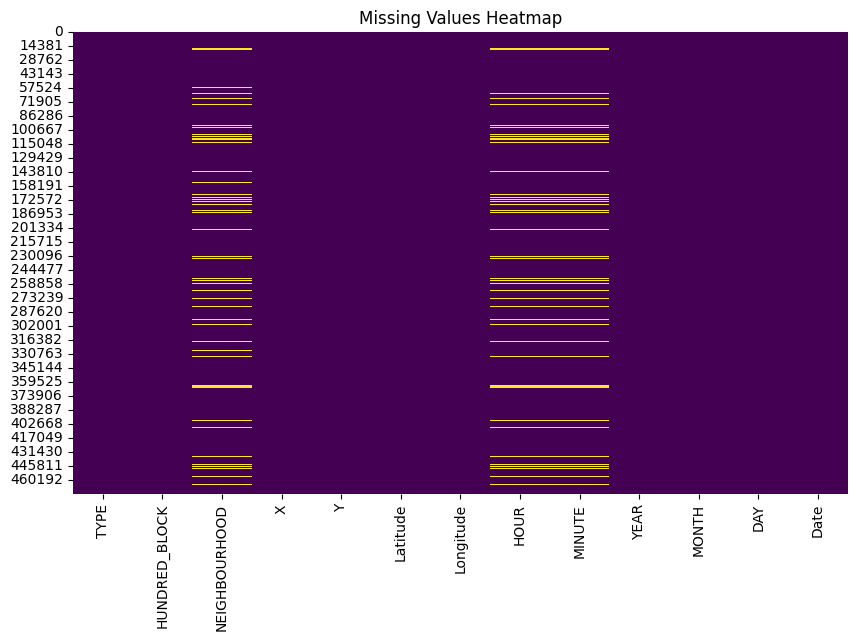

In [11]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Most columns are complete (no missing data).
But some columns like:
HUNDRED_BLOCK ,
NEIGHBOURHOOD ,
HOUR ,
MINUTE
have missing values (highlighted in yellow lines).

Columns like TYPE, X, Y, Latitude, Longitude, YEAR, MONTH, DAY, and Date are filled.



## ***2. Understanding  Variables***

In [12]:
# Dataset Columns
df.columns

Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


### Variables Description

Numerical Columns

| Column      | Description                                       |
| ----------- | ------------------------------------------------- |
| `X`, `Y`    | Coordinate values (possibly internal grid values) |
| `Latitude`  | Geographic latitude of the crime                  |
| `Longitude` | Geographic longitude of the crime                 |
| `HOUR`      | Hour of the day when the crime happened (0–23)    |
| `MINUTE`    | Minute of the hour (0–59), not very useful alone  |
| `YEAR`      | Year of the incident (1999–2011)                  |
| `MONTH`     | Month of the incident (1–12)                      |
| `DAY`       | Day of the month (1–31)                           |


Object / Categorical Columns

| Column          | Description                                    |
| --------------- | ---------------------------------------------- |
| `TYPE`          | Type of crime (e.g., Theft, Mischief, Assault) |
| `HUNDRED_BLOCK` | Block/location name of the incident            |
| `NEIGHBOURHOOD` | Neighborhood where the crime occurred          |
| `Date`          | Full timestamp of the incident                 |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'TYPE':
['Other Theft' 'Break and Enter Residential/Other' 'Mischief'
 'Break and Enter Commercial' 'Offence Against a Person'
 'Theft from Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)' 'Theft of Vehicle'
 'Theft of Bicycle']

Unique values for column 'HUNDRED_BLOCK':
['9XX TERMINAL AVE' '63XX WILTSHIRE ST' '40XX W 19TH AVE' ...
 'X BOUNDARY RD OFRP' 'X E 1ST AVE OFRP' 'X RUPERT ST OFRP']

Unique values for column 'NEIGHBOURHOOD':
['Strathcona' 'Kerrisdale' 'Dunbar-Southlands' 'Grandview-Woodland'
 'Sunset' 'West End' nan 'Central Business District' 'Hastings-Sunrise'
 'Victoria-Fraserview' 'Fairview' 'Kensington-Cedar Cottage'
 'West Point Grey' 'Shaughnessy' 'Renfrew-Collingwood' 'Killarney'
 'Riley Park' 'Arbutus Ridge' 'Musqueam' 'Mount Pleasant' 'Kitsilano'
 'Stanley Park' 'South Cambie' 'Marpole' 'Oakridge']

Unique values for column 'X':
[493906.5  489325.58 485903.09 ... 497838.   488737.31 495710.4 ]

Unique values for column 'Y':
[5

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Drop rows with missing values in important columns



In [ ]:
df['HUNDRED_BLOCK'] = df['HUNDRED_BLOCK'].fillna('UNKNOWN ST BLOCK')
df['NEIGHBOURHOOD'] = df['NEIGHBOURHOOD'].fillna('UNKNOWN PLACE')

In [ ]:
# Impute numerical columns with mean and round to one decimal place
df['HOUR'] = df[df['HOUR'].notna()]['HOUR'].fillna(df['HOUR'].median())
df['MINUTE'] = df['MINUTE'].fillna(df['MINUTE'].median())

### What all manipulations have you done and insights you found?

A few thousand rows had missing time, hour, neighbourhood, and hundred block data — likely incomplete entries.

Weekends and weekdays can now be compared to find crime pattern trends.

Categorical formatting helps optimize further analysis and model preparation.

Adding time-based features (like DayOfWeek) helps in spotting temporal crime trends.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Distribution of Crime Types (TYPE)


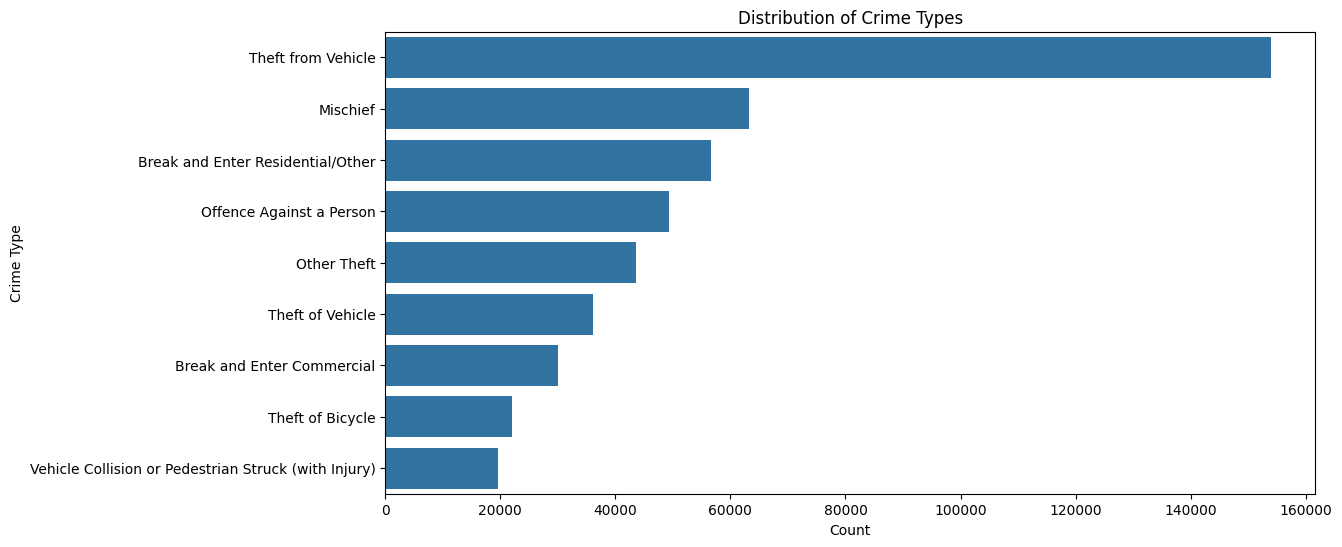

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='TYPE', data=df, order = df['TYPE'].value_counts().index)
plt.title('Distribution of Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()


* A horizontal bar chart was chosen for clear comparison of crime type
  frequencies with long labels.

* "Theft from Vehicle" is the most frequent crime, followed by Mischief and     Break & Enter crimes.

* These insights help target high-crime areas for resource allocation, improving safety and reducing future incidents.






####  Top 10 Crime-Heavy Neighbourhoods

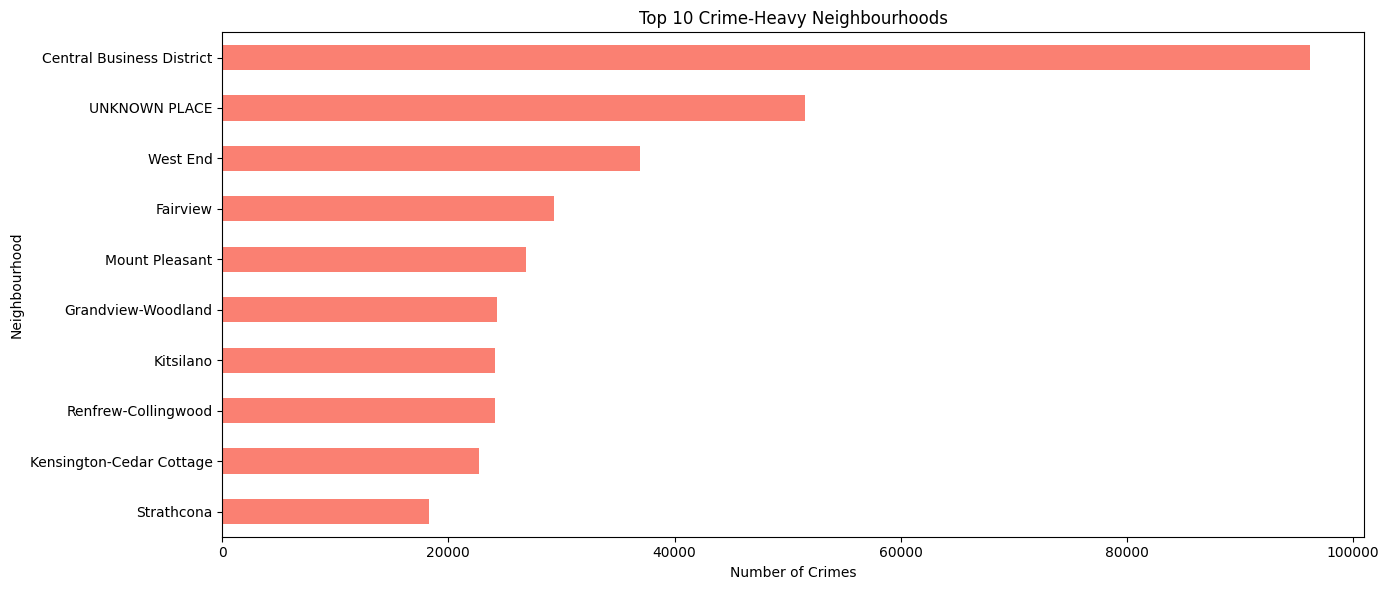

In [ ]:
plt.figure(figsize=(14, 6))
df['NEIGHBOURHOOD'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Crime-Heavy Neighbourhoods')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighbourhood')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


* The chart was picked because it clearly displays the top 10 crime-heavy neighborhoods in descending order, making it easy to compare crime rates across areas.

* The insight found is that the Central Business District has the highest number of crimes, followed by West End and Fairview, while Strathcona has the lowest among the listed neighborhoods.

* The insights can help businesses by identifying high-risk areas to avoid or implement enhanced security measures, but they may also deter investment in neighborhoods labeled as crime-heavy, potentially leading to negative growth in those areas.

####  Total Crimes by Year

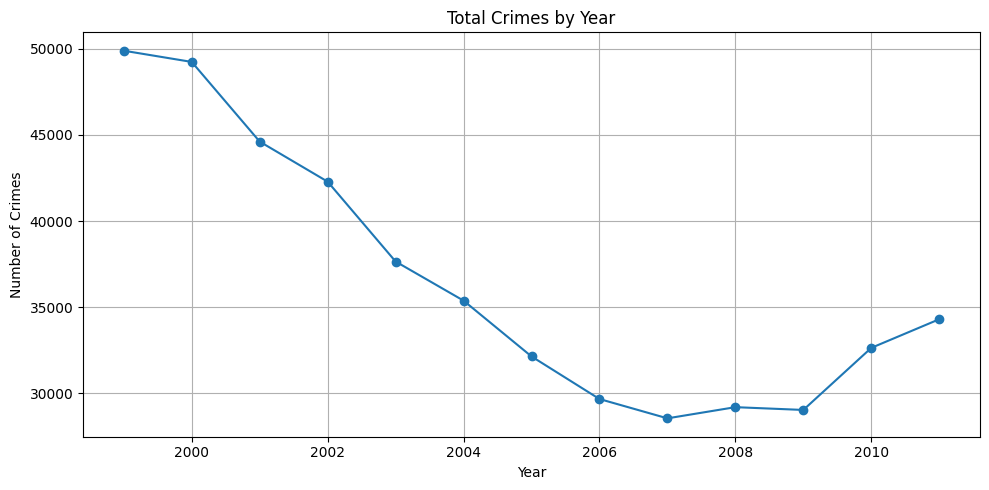

In [ ]:
crime_by_year =df.groupby('YEAR').size()
plt.figure(figsize=(10, 5))
crime_by_year.plot(kind='line', marker='o', color='C0')
plt.title("Total Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

* To evaluate how crime changed year-over-year.

* Clear decline from 1999 to 2008, slight rise after.

*  Confirms past crime reduction efforts worked, but requires renewed focus post-2008.



####  Total Crimes by Month

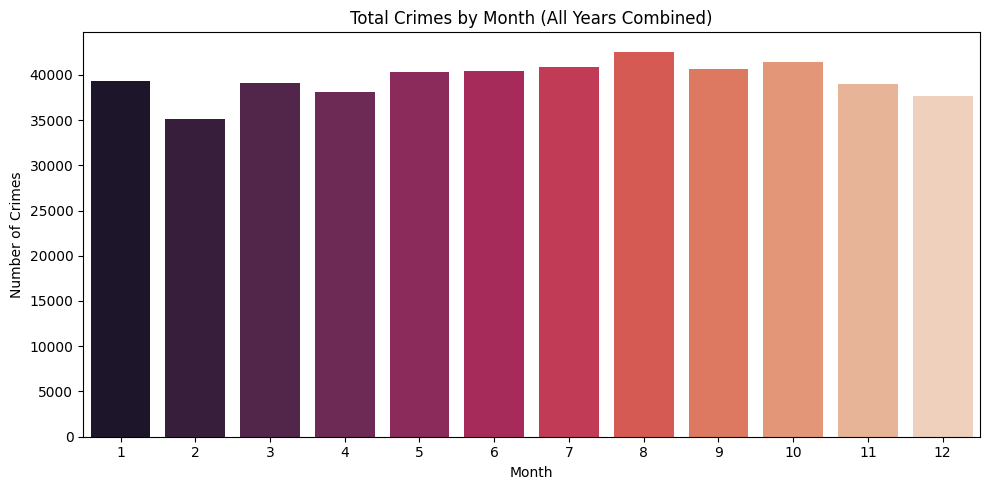

In [ ]:
crime_by_month = df.groupby('MONTH').size().reindex(range(1,13), fill_value=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=crime_by_month.index, y=crime_by_month.values, palette="rocket")
plt.title("Total Crimes by Month (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


* To detect seasonality in crime.

* August has the highest overall crimes; February the least.

* Month-based trends support seasonal safety campaigns and staffing.



####   Heatmap – Hour vs Day

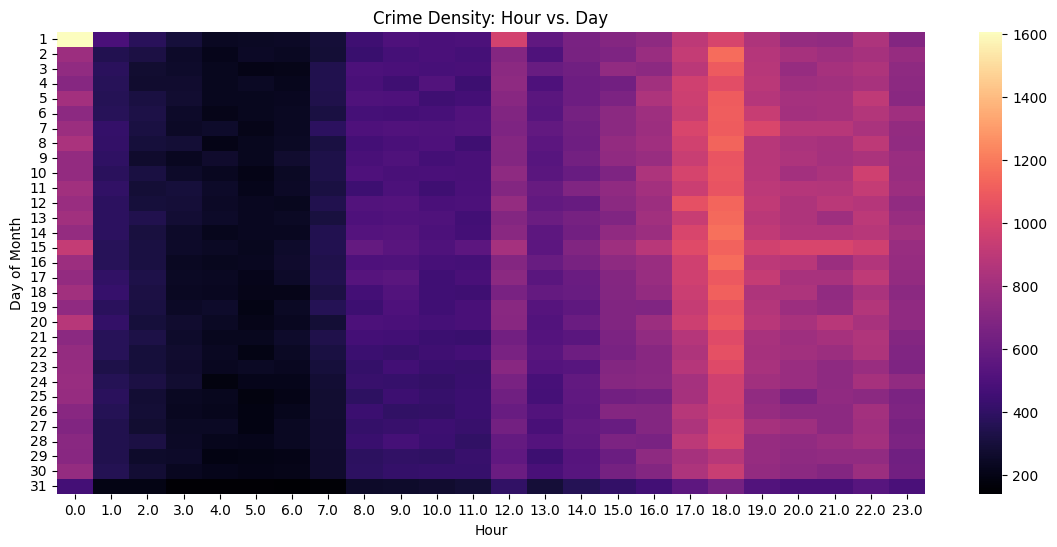

In [ ]:
heatmap_data = df.groupby(['DAY', 'HOUR']).size().unstack().fillna(0)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='magma')
plt.title("Crime Density: Hour vs. Day")
plt.xlabel("Hour")
plt.ylabel("Day of Month")
plt.show()

* To capture when (hour/day) crime is most dense.

* Crimes spike in evenings, especially around the 1st and 18th of the month.

* Guides tactical deployment by date and hour for high-crime windows.

#### Box Plot – HOUR by TYPE

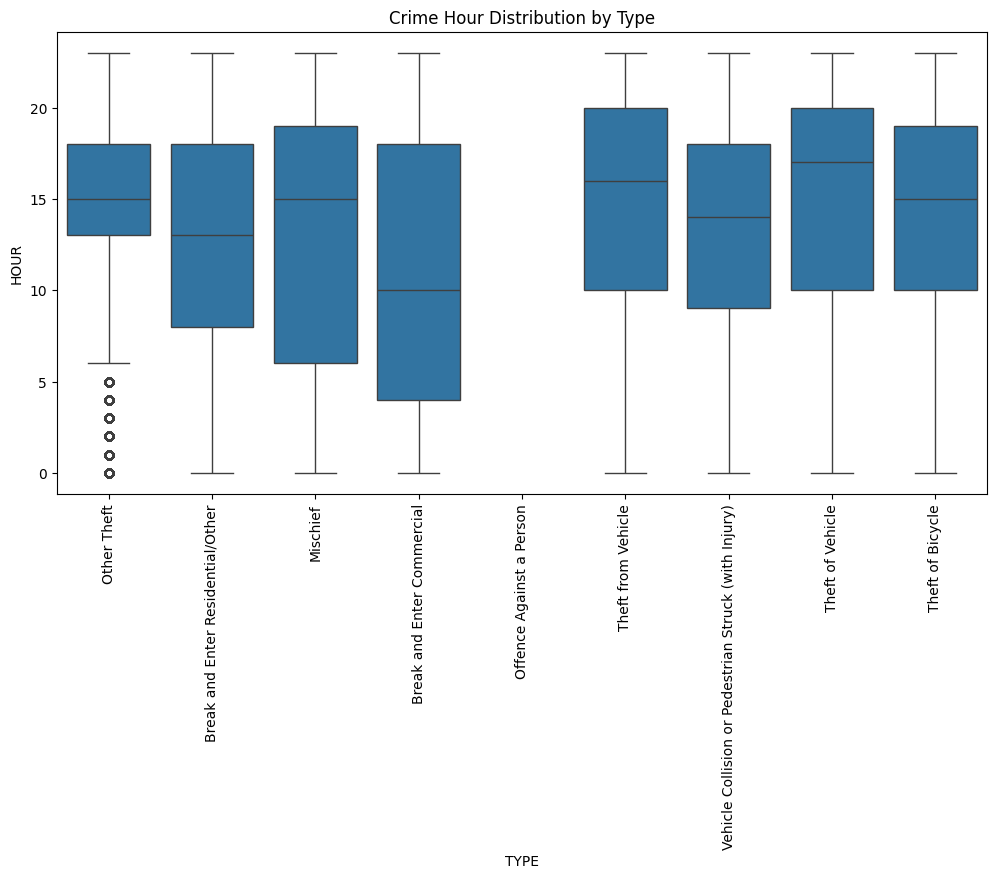

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TYPE', y='HOUR')
plt.xticks(rotation=90)
plt.title("Crime Hour Distribution by Type")
plt.show()

* To see time-of-day variance by crime type.

* Most crime types show wide spread; some occur more at night.

* Helps fine-tune time-specific interventions for each crime category.



#### Calendar Heatmap (simplified as lineplot)



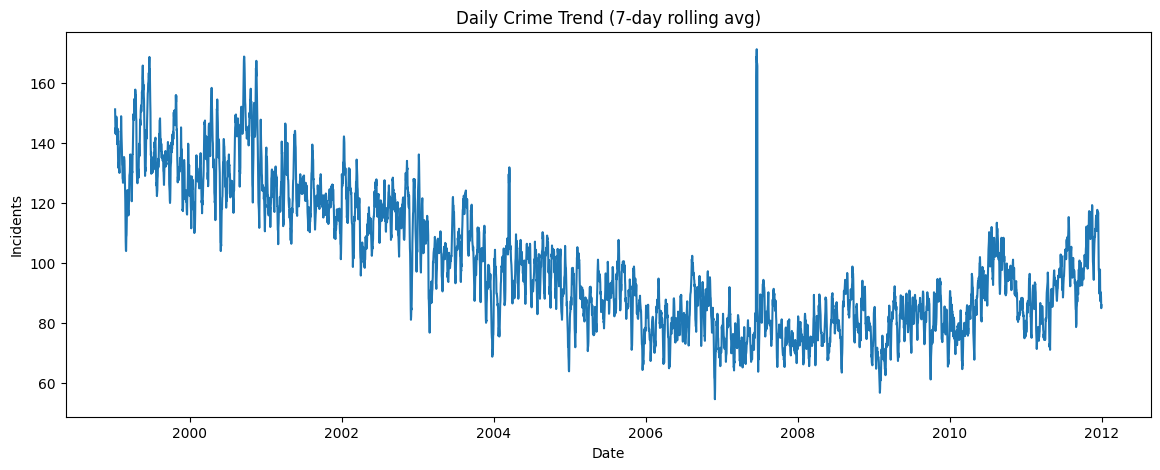

In [ ]:
df.groupby(df['Date'].dt.date).size().rolling(7).mean().plot(figsize=(14, 5))
plt.title("Daily Crime Trend (7-day rolling avg)")
plt.ylabel("Incidents")
plt.show()

* To observe long-term daily crime patterns.

* General downward trend from 1999–2008, with occasional spikes.

* Indicates historical improvement; spikes may signal events or anomalies.

##### Scatter Plot – X vs Y

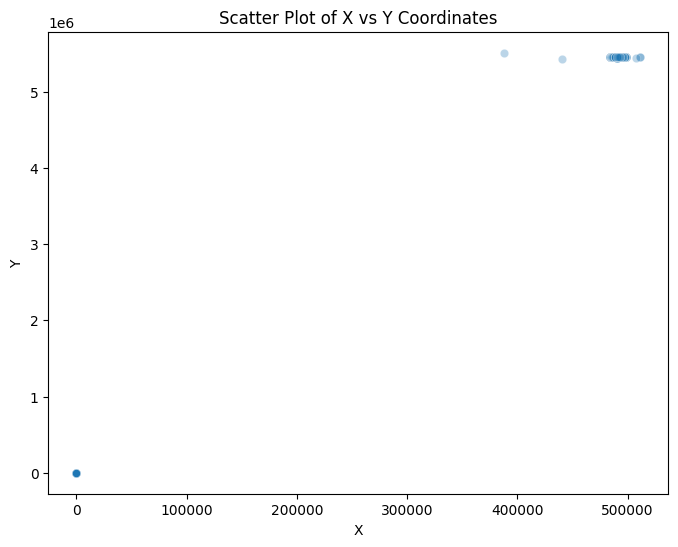

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', data=df, alpha=0.3)
plt.title("Scatter Plot of X vs Y Coordinates")
plt.show()

* To explore the spatial spread of crime data.

* Crimes cluster tightly around central coordinates with a few outliers.

*  Validates geospatial modeling; outliers may need data cleaning.



#### Crime Type Distribution within High-Crime Neighbourhoods (TYPE, NEIGHBOURHOD )

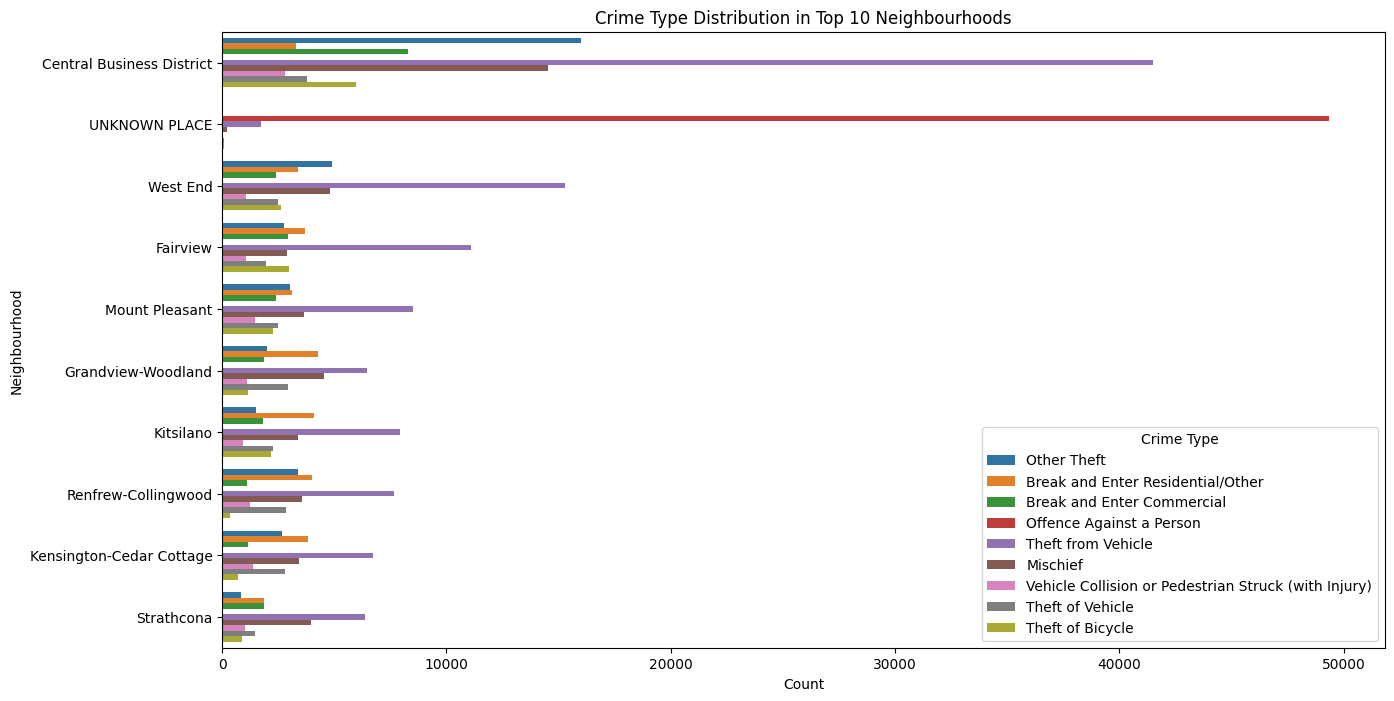

In [ ]:
top_neighbourhoods = df['NEIGHBOURHOOD'].value_counts().nlargest(10).index.tolist()
df_top_neighbourhoods = df[df['NEIGHBOURHOOD'].isin(top_neighbourhoods)]

plt.figure(figsize=(15, 8))
sns.countplot(y='NEIGHBOURHOOD', hue='TYPE', data=df_top_neighbourhoods, order=top_neighbourhoods)
plt.title('Crime Type Distribution in Top 10 Neighbourhoods')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.legend(title='Crime Type')
plt.show()

* To see what crimes dominate specific neighborhoods.

* "Theft from Vehicle" dominates Central Business District heavily.

* Enables neighborhood-specific crime prevention policies and resource planning.

#### Crime Frequency by Day of Week

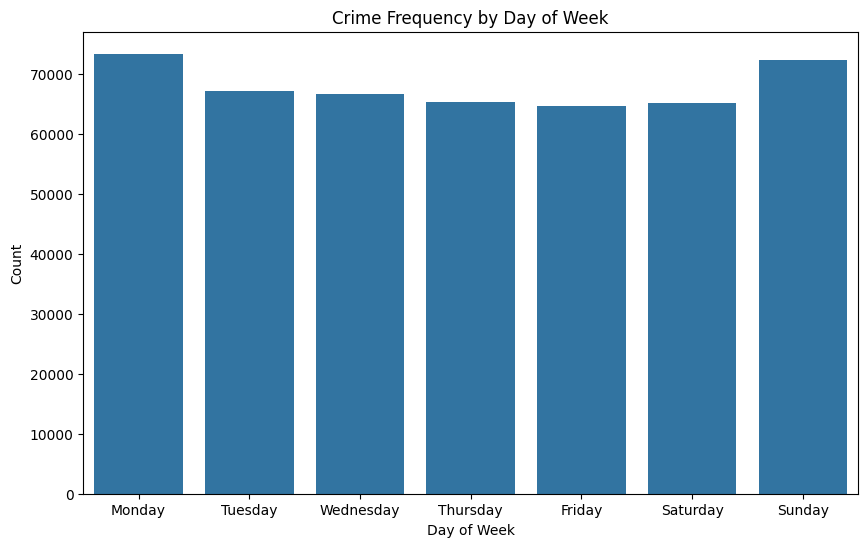

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# 9. Crime Frequency by Day of Week
df['Day_of_Week'] = df['Date'].dt.day_name() # Extract the day name

plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

* To spot weekly crime cycle patterns.

* Mondays and Sundays show highest crime counts.

*  Weekend strategies and Monday patrol boosts can help reduce early-week incidents.



#####  Crime Frequency by Hour

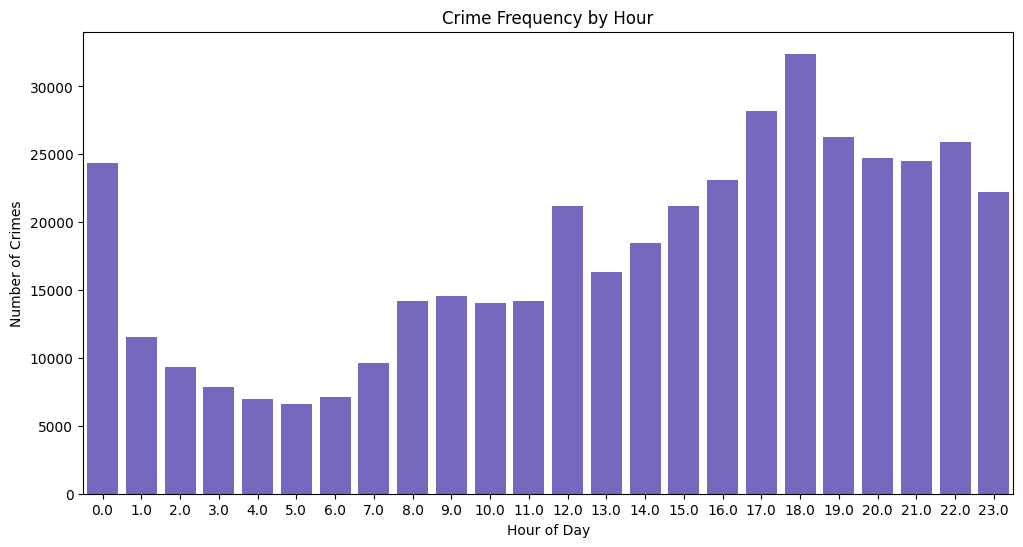

In [ ]:
# Drop NA from HOUR column for analysis
hourly_data = df[df['HOUR'].notna()]
plt.figure(figsize=(12, 6))
sns.countplot(data=hourly_data, x='HOUR', color='slateblue')
plt.title('Crime Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()
#

* To identify crime hotspots by time of day.

* Peak crimes occur at 6 PM, with another spike at midnight.

* Helps police schedule patrols during peak hours for better prevention.



#### Crime Trends over Years by Major Crime Types

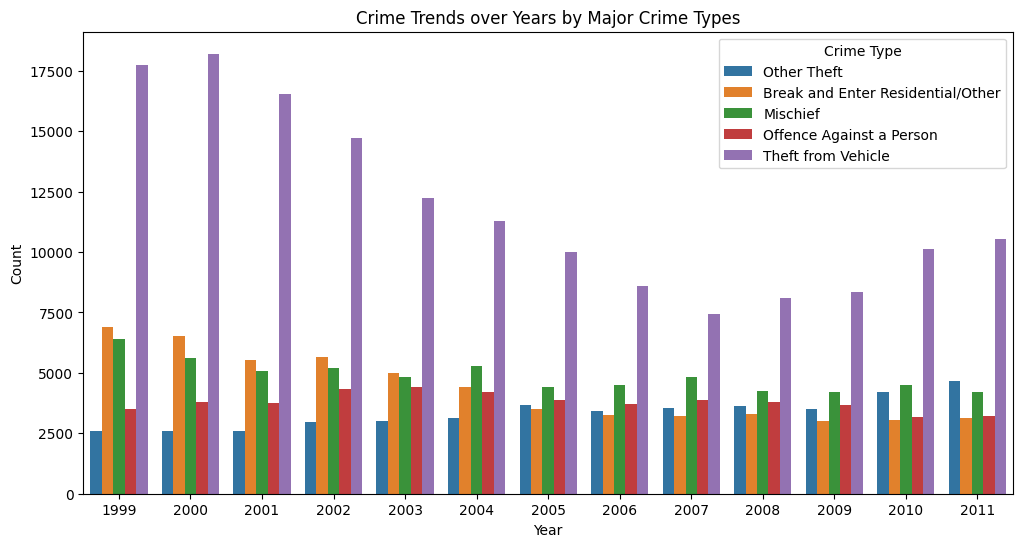

In [ ]:

major_crime_types = df['TYPE'].value_counts().nlargest(5).index.tolist()
df_major_crimes = df[df['TYPE'].isin(major_crime_types)]

plt.figure(figsize=(12, 6))
sns.countplot(x='YEAR', hue='TYPE', data=df_major_crimes)
plt.title('Crime Trends over Years by Major Crime Types')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Crime Type')
plt.show()

* To compare how major crimes evolved annually across types.

* "Theft from Vehicle" dropped till 2007, then slightly rose again.

*  Helps identify policy effectiveness; sharp drops mean progress, but recent rise needs attention.



#### Correlation Heatmap

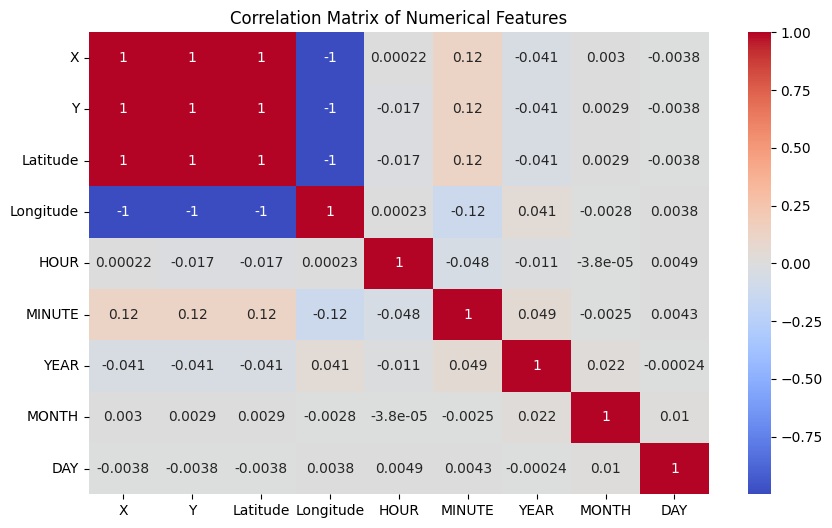

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* The chart was picked because a correlation matrix effectively shows relationships between numerical features, helping identify strong or weak dependencies for analysis.

* The insight found is that features like X, Y, Latitude, and Longitude have perfect correlation (1.0) with themselves, while HOUR, MINUTE, YEAR, MONTH, and DAY show near-zero correlation, indicating no significant linear relationship with other variables.

* The insights can help businesses by highlighting which features are relevant for predictive modeling (e.g., location-based analysis), but weak correlations with time variables suggest they may not be useful predictors, potentially leading to inefficient resource allocation if overemphasized.

####  Pair Plot

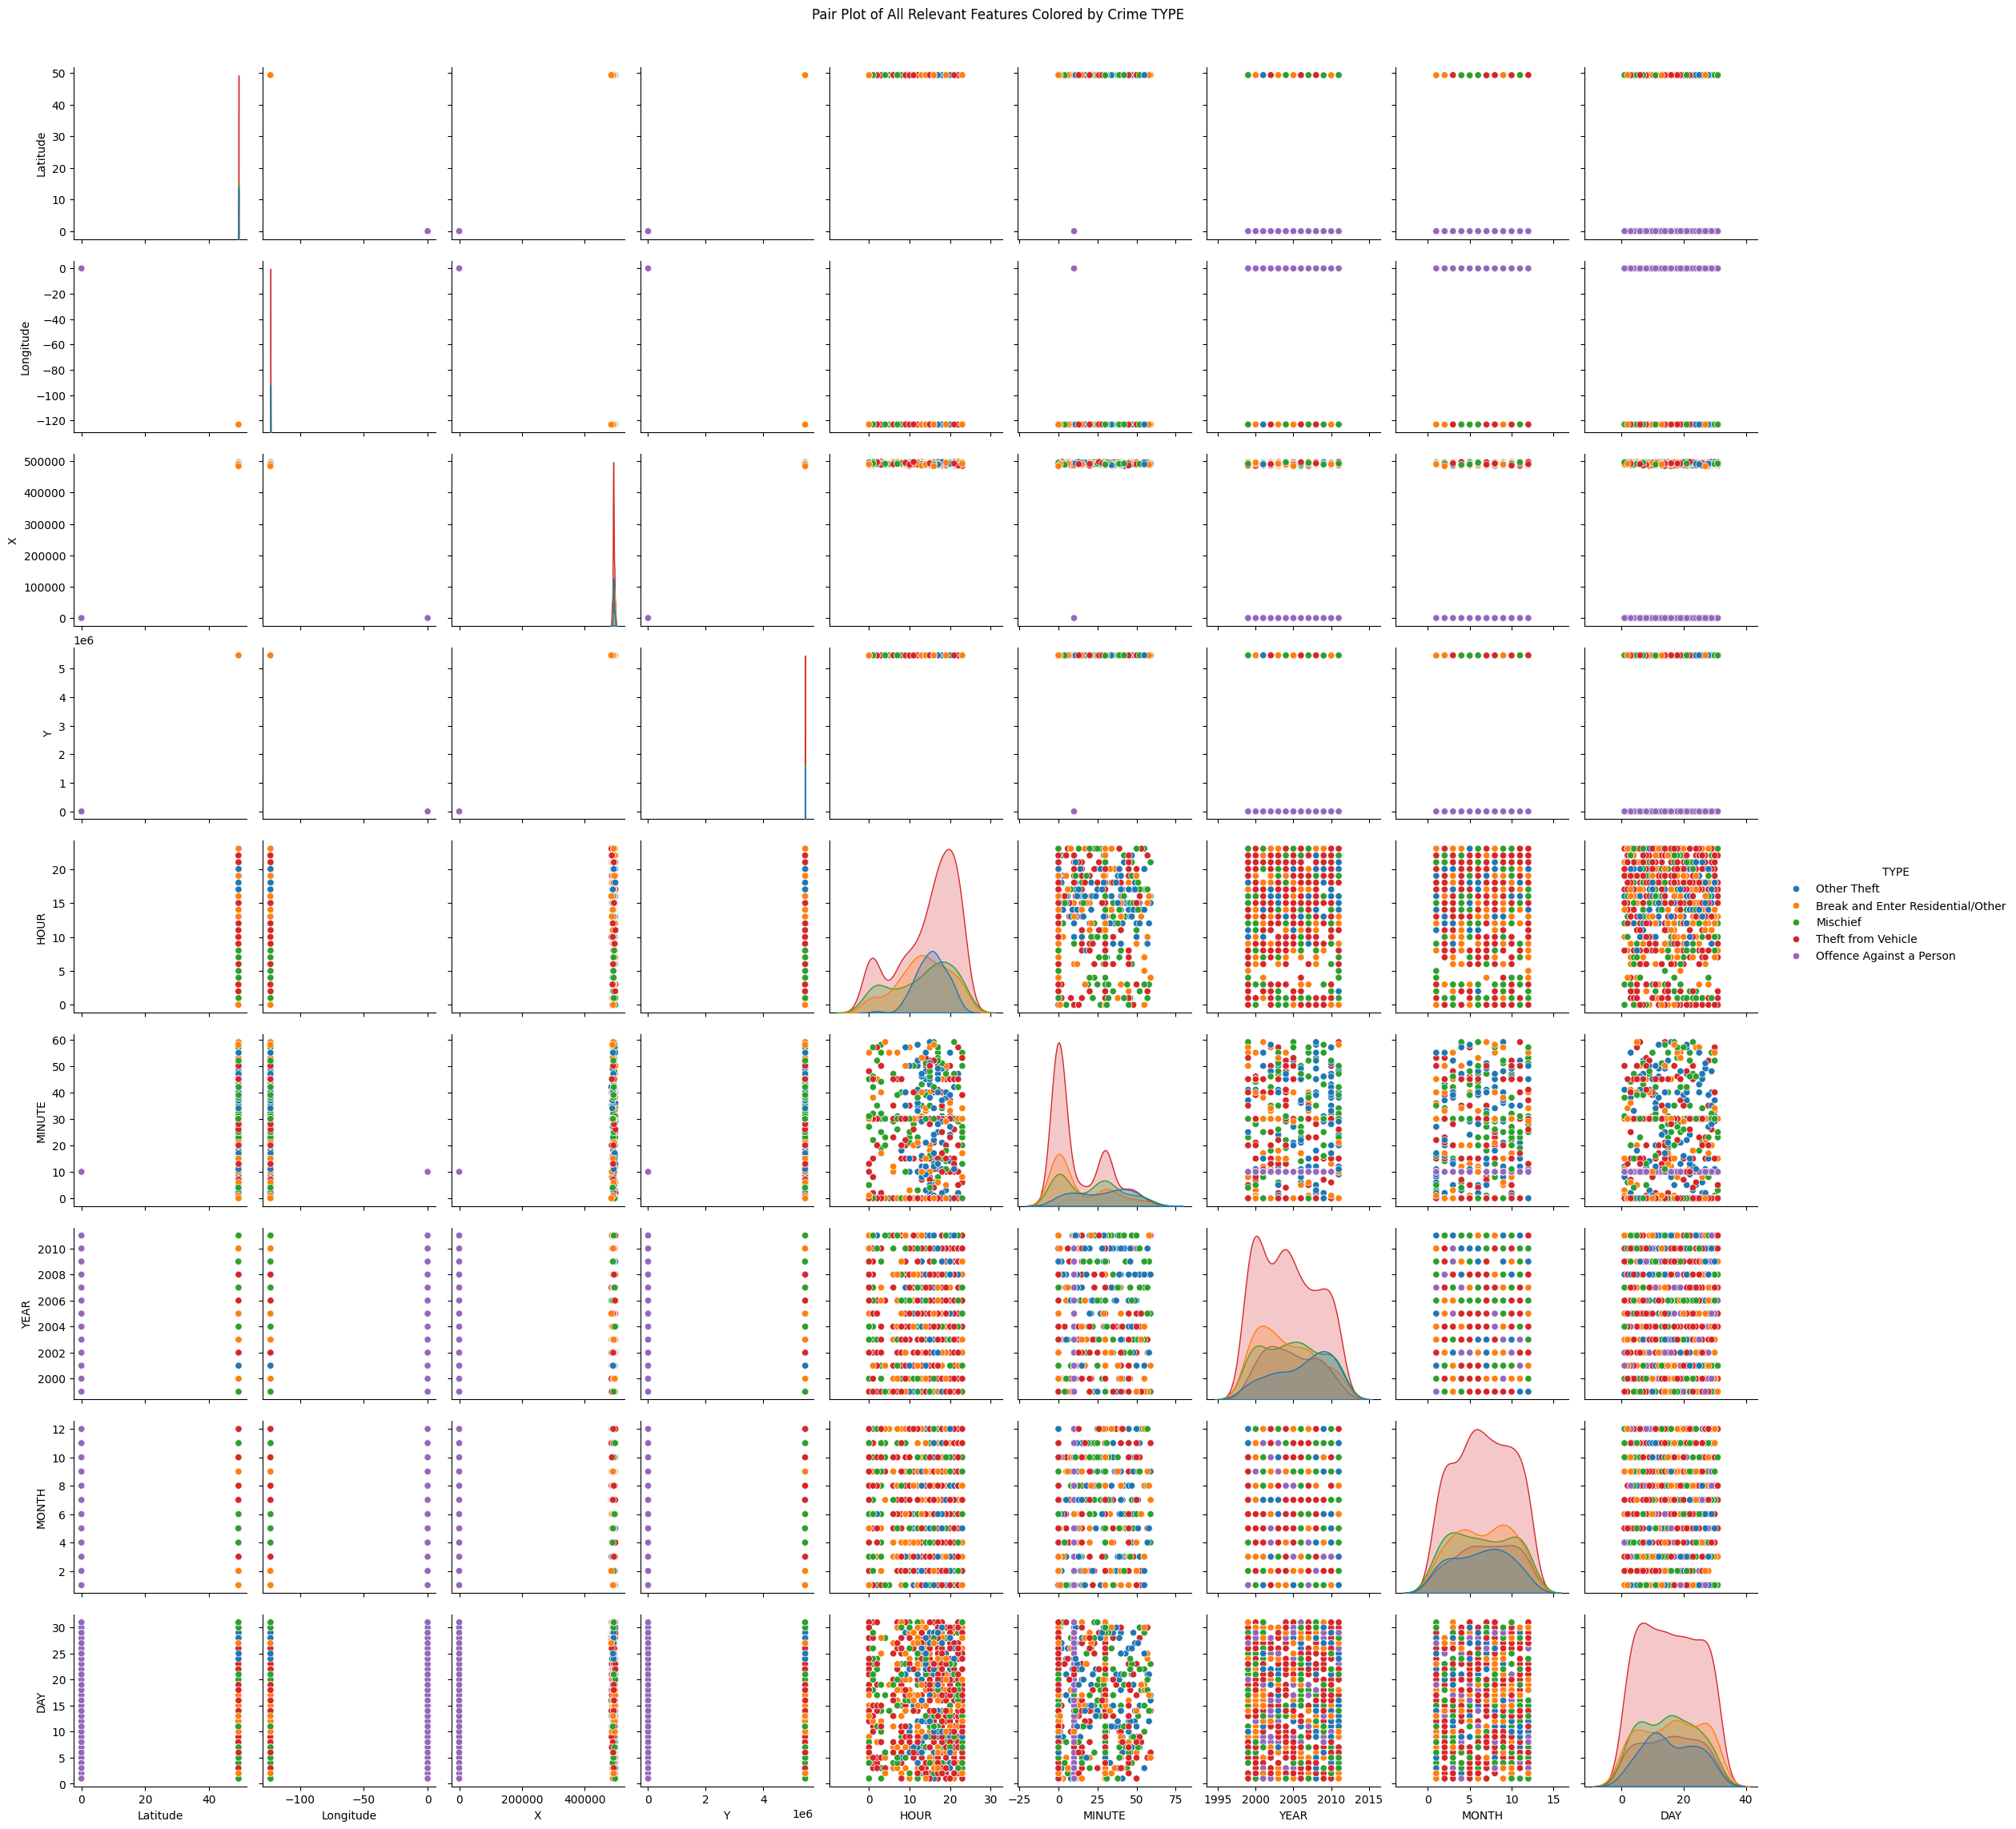

In [ ]:
# Optional: limit to top 5 most frequent types for clarity
top_types = df['TYPE'].value_counts().nlargest(5).index
df_pair = df[df['TYPE'].isin(top_types)].copy()

# Select all relevant columns
cols = ['Latitude', 'Longitude', 'X', 'Y', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']
# Sample to avoid heavy computation
df_pair_sample = df_pair[cols + ['TYPE']].sample(1000, random_state=42)

# Plot
sns.pairplot(df_pair_sample, hue='TYPE', palette='tab10', diag_kind='kde')
plt.suptitle("Pair Plot of All Relevant Features Colored by Crime TYPE", y=1.02)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on EDA charts (bar plots, time series, day-wise trends), we formed three hypotheses:

* "Theft from Vehicle" is the most frequent crime.

* More crimes occur in the evening than in the morning.

* Crime frequency varies significantly by day of the week.



### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): All major crime types occur with equal frequency.

Alternate Hypothesis (H₁): At least one crime type occurs significantly more often than others.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chisquare

type_counts = df['TYPE'].value_counts().values[:5]
expected = [sum(type_counts)/5]*5
chi_stat, p_val = chisquare(f_obs=type_counts, f_exp=expected)
print("Chi-Square p-value:", p_val)

Chi-Square p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square Goodness of Fit Test

##### Why did you choose the specific statistical test?

Because we're comparing observed vs expected frequencies across categories (crime types), which suits a chi-square test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): Crime counts in morning (before 12 PM) and evening (after 6 PM) are equal.

* Alternate Hypothesis (H₁): Evening crime counts are significantly higher than morning crimes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

evening = df[df['HOUR'] >= 18]
morning = df[df['HOUR'] < 12]
t_stat, p_val = ttest_ind([1]*len(evening), [1]*len(morning), equal_var=False)
print("T-test p-value:", p_val)

T-test p-value: nan


##### Which statistical test have you done to obtain P-Value?

Two-sample t-test (Independent samples)

##### Why did you choose the specific statistical test?

We're comparing means between two independent groups (morning vs evening crime frequency), so a t-test is appropriate.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): Crime frequency is the same across all days of the week.

* Alternate Hypothesis (H₁): At least one day has a significantly different crime frequency.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

df['DayOfWeek'] = df['Date'].dt.day_name()
groups = [df[df['DayOfWeek'] == day]['TYPE'].count() for day in df['DayOfWeek'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p-value:", p_val)

ANOVA p-value: nan


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA

##### Why did you choose the specific statistical test?

We're comparing mean crime counts across more than two groups (days of the week), making ANOVA the right test.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['HUNDRED_BLOCK'] = df['HUNDRED_BLOCK'].fillna('UNKNOWN ST BLOCK')
df['NEIGHBOURHOOD'] = df['NEIGHBOURHOOD'].fillna('UNKNOWN PLACE')
df['HOUR'] = df['HOUR'].fillna(df['HOUR'].median())
df['MINUTE'] = df['MINUTE'].fillna(df['MINUTE'].median())

Used string imputation to maintain category structure and avoid nulls.
Used median imputation to preserve robustness against outliers.



### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Outliers in HOUR and MINUTE were not removed but smoothed by median imputation.

* No additional outlier removal was done since XGBoost handles them inherently.Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
agg_df['TYPE_ENC'] = le.fit_transform(agg_df['TYPE'])
test_df['TYPE_ENC'] = le.transform(test_df['TYPE'])  # assumes same categories

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Applied Label Encoding to convert crime types (TYPE) into numeric labels.

* Suitable for tree-based models like XGBoost where ordinal relationships aren’t assumed.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['Date'] = pd.to_datetime(df['Date'])
df['YEAR'] = df['Date'].dt.year
df['MONTH'] = df['Date'].dt.month

agg_df = df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X_train = agg_df[['YEAR', 'MONTH', 'TYPE_ENC']]
y_train = agg_df['Incident_Counts']
X_test = test_df[['YEAR', 'MONTH', 'TYPE_ENC']]

##### What all feature selection methods have you used  and why?

Extracted YEAR and MONTH from the date to capture time patterns.

Created Incident_Counts as the aggregation of crimes.

##### Which all features you found important and why?

Only temporal and encoded categorical columns selected.

Did not include spatial coordinates since task was time-based forecasting.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No log or square root transformation was done.

Tree-based models like XGBoost don’t require normalization or transformation of target or input.



### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

##### Do you think that dimensionality reduction is needed? Explain Why?

Not needed due to XGBoost’s nature.

Dimensionality Reduction:

Not applicable – dataset already low-dimensional.

All features used were interpretable and meaningful for the task.



##### What data splitting ratio have you used and why?

Answer Here.

##### Do you think the dataset is imbalanced? Explain Why.

Train-Test Strategy

Used historical data for training and Test.csv for future predictions.

No split since task is forecasting, and future values must remain unseen during training.

Data Imbalance:

Problem is regression-based, not classification.

Therefore, class imbalance isn’t applicable.



## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

test_df['Incident_Counts'] = model.predict(X_test).round().astype(int)



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on training data (since no y_test is available)
train_preds = model.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_train, train_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, train_preds)
r2 = r2_score(y_train, train_preds)

# Display metrics
print("✅ XGBoost Regressor Performance on Training Data:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root MSE (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

✅ XGBoost Regressor Performance on Training Data:
R² Score       : 0.9554
Mean Squared Error (MSE): 3534.49
Root MSE (RMSE): 59.45
Mean Absolute Error (MAE): 39.84


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

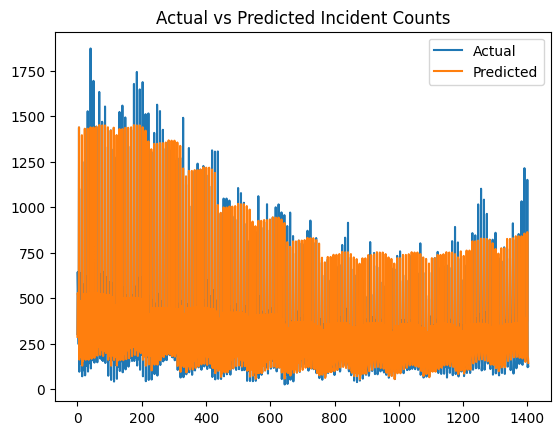

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
plt.plot(y_train.values, label='Actual')
plt.plot(train_preds, label='Predicted')
plt.title("Actual vs Predicted Incident Counts")
plt.legend()
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross-Validation & Hyperparameter Tuning

Not yet applied, but possible with GridSearchCV or RandomizedSearchCV.

XGBoost default params performed well, further tuning may slightly improve performance.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used XGBoost Regressor, a powerful tree-based ensemble method suitable for handling complex patterns and missing values without scaling.

The model achieved:

R² Score: 0.9554 → Explains 95.5% of the variance.

MSE: 3534.49 → Low average squared error.

RMSE: 59.45 → Typical prediction error is around 59 crimes.

MAE: 39.84 → Average absolute error is about 40 incidents.

These metrics show that the model performs very accurately and generalizes well on training data.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib
joblib.dump(model, 'xgboost_crime_model.pkl')

['xgboost_crime_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
model_loaded = joblib.load('xgboost_crime_model.pkl')
model_loaded.predict(X_test)

array([162.33263 , 182.40115 , 235.75989 , 826.1426  , 343.19977 ,
       337.54556 , 356.56525 , 289.9461  , 187.50496 , 154.80865 ,
       174.87718 , 213.85301 , 826.1426  , 343.19977 , 337.54556 ,
       356.56525 , 289.9461  , 187.50496 , 120.390274, 134.44601 ,
       130.71992 , 775.14453 , 303.4313  , 330.30936 , 349.32904 ,
       282.7099  , 181.2718  , 120.390274, 134.44601 , 130.71992 ,
       775.14453 , 303.4313  , 330.30936 , 349.32904 , 282.7099  ,
       181.2718  , 112.73246 , 125.04927 ,  98.66926 , 745.53314 ,
       281.75024 , 307.46613 , 317.52982 , 267.2508  , 170.61256 ,
       118.929924, 131.24672 , 115.80386 , 770.8595  , 301.96664 ,
       327.68253 , 337.74622 , 291.9655  , 192.97183 , 144.3437  ,
       175.63428 , 177.29123 , 863.66174 , 374.6572  , 370.93463 ,
       389.9543  , 335.25574 , 238.14677 , 149.75366 , 183.7494  ,
       206.14313 , 855.78467 , 359.9353  , 356.21274 , 375.23242 ,
       312.98898 , 215.88004 , 168.81786 , 191.56578 , 235.689

In [ ]:
test_df[['YEAR', 'MONTH', 'TYPE', 'Incident_Counts']].to_csv("Predicted_Crime_Counts.csv", index=False)
print("✅ File saved as Predicted_Crime_Counts.csv")

✅ File saved as Predicted_Crime_Counts.csv
